**Santiago Aristizabal M - 2195475**

---



In [29]:
!git clone https://github.com/sam2800ml/Aprendizaje_Automatico


Cloning into 'Aprendizaje_Automatico'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (10/10), 557.54 KiB | 2.26 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
path = "/content/Aprendizaje_Automatico/Datasets/data_billetes.csv"
df = pd.read_csv(path)

In [ ]:
print(f"Dimensiones del dataset a usar {df.shape}")

Dimensiones del dataset a usar (1372, 5)


In [22]:
df['class'].value_counts().to_frame()

,count
class,
0,738
1,610


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


El Dataset presenta 1372 datos con 5 caracteristicas, de las cuales 4 son de entrada, y 1 es la salida la cual se hara la prediccion, el dataset ademas no presenta numeros nulos


---

* Varianza: Describe la cantidad de variacion o dispersion en las intensidades de pixeles en una imagen

* Asimetria: Describe la falta de asimetria en la distribucion de los datos

* Curtosis: La curtosis es una medida estadística que describe la "colacidad" de la distribución de probabilidad

* Entropia:  la entropía puede medir la cantidad de información o aleatoriedad en los valores de los píxeles.

* Clase: 0 y 1 para billetes de banco genuinos y falsos

In [4]:
df.duplicated().sum()

24

En el dataset se encuentran 24 datos duplicaods, los cuales no cuentan con un gran numero de datos por lo cuales se pueden eliminar y no afectaria tanto

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


En el momento en el cual se observa el pairplot, es complicado hacer la separacion entre las clases ya que presentan una forma similar, pero segun la grafica diria que de las caracteristicas, las mas separables son la varianza, skewness, curtosisi y entropy

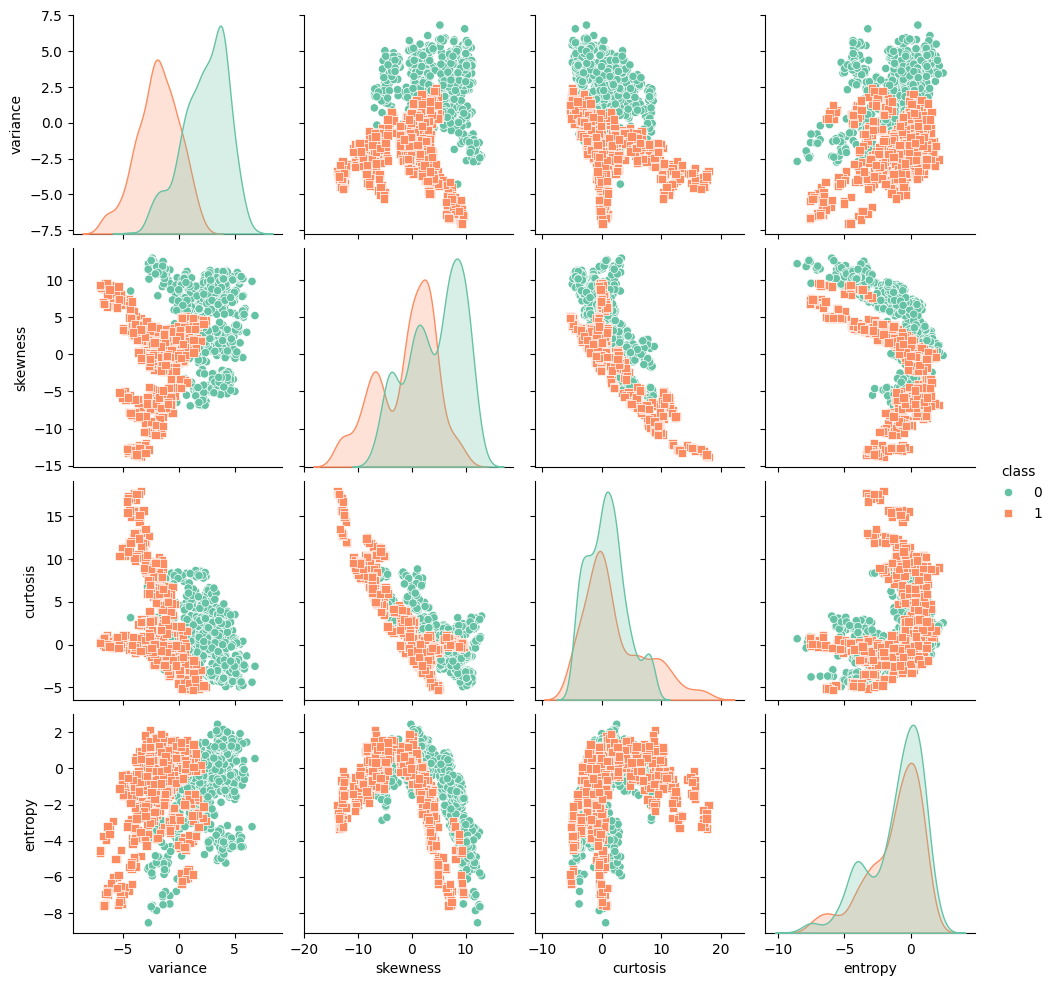

In [18]:
sns.pairplot(df, hue="class", markers=["o", "s"], palette="Set2")

Con comparacion al pairplot realizado antes, se logra identificar que la mejor carcateristica para identificar las dos clases es la varianza, despues sigue skewness, curtosis y por ultimo entropy, que se logra evidenciar que tienen un mismo comportamiento

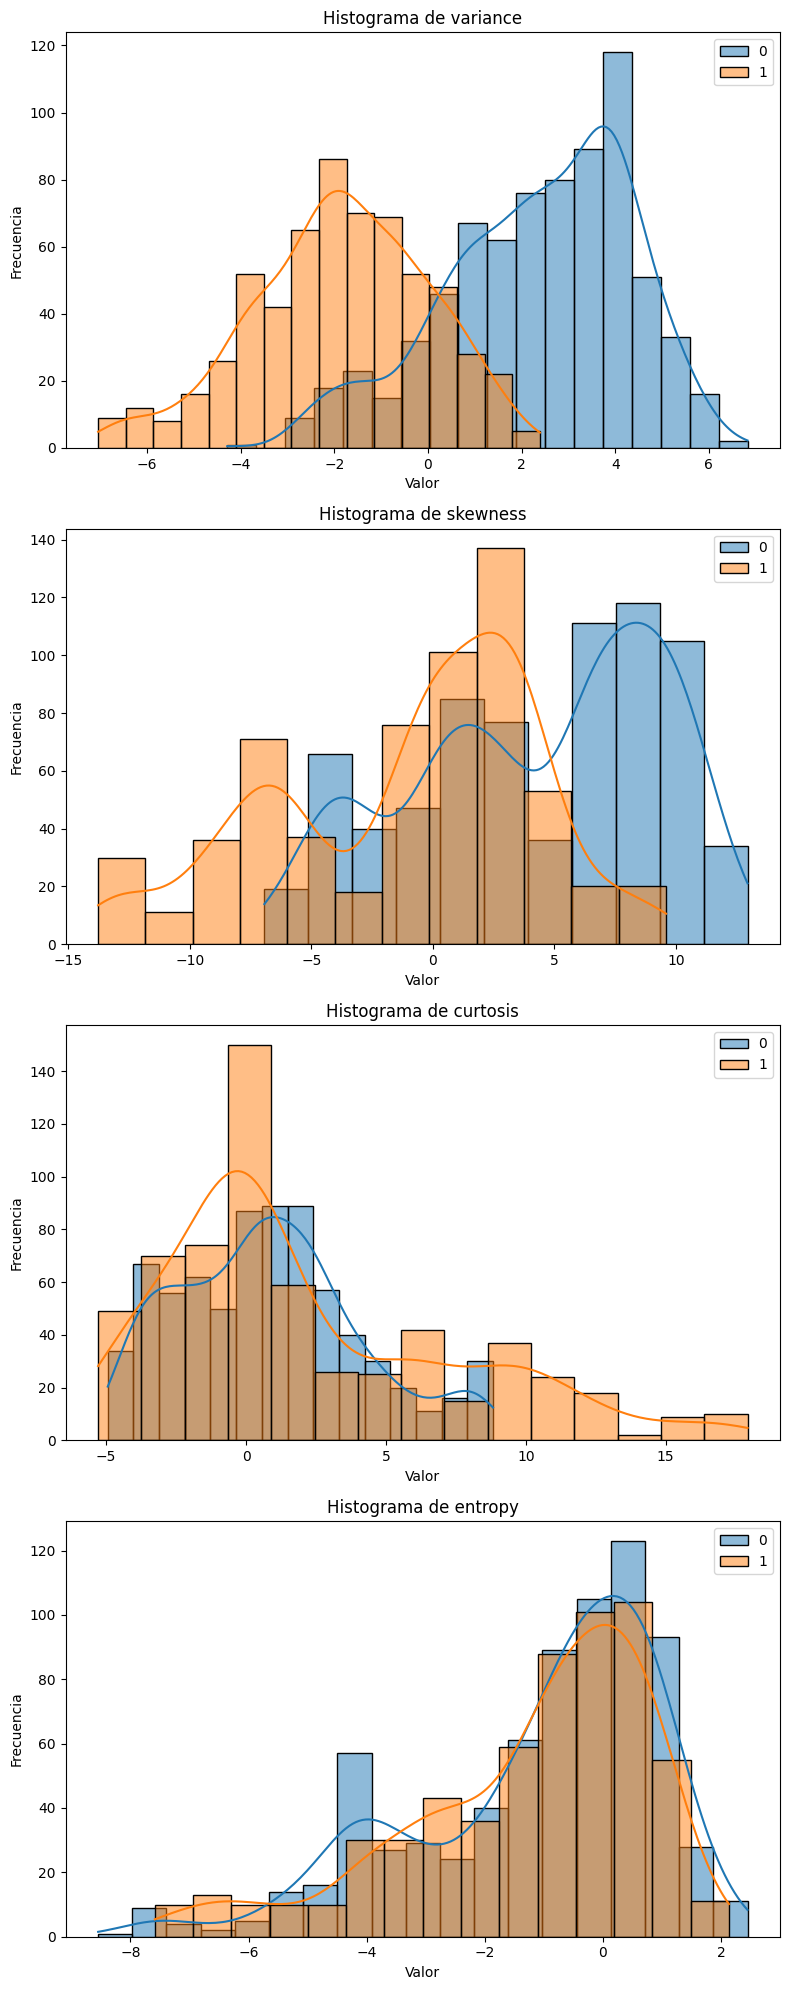

In [17]:
# Crear las figuras y los subplots
fig, axes = plt.subplots(4, 1, figsize=(8, 20))

# Lista de características y clases
features = ['variance', 'skewness', 'curtosis', 'entropy']
classes = df['class'].unique()

# Iterar sobre las características y crear histogramas para cada clase
for i, feature in enumerate(features):
    for cls in classes:
        sns.histplot(df[df['class'] == cls][feature], ax=axes[i], label=cls, kde=True)
    axes[i].set_title(f'Histograma de {feature}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar las figuras
plt.show()

En el momento de mirar la correlacion que tienen las caracteristicas con la salida, se identifica que esta en lo correcto ya que la clase con la peor correlacion es entropy, sin embargo parece que entropy tiene una mejor correlacion que las demas

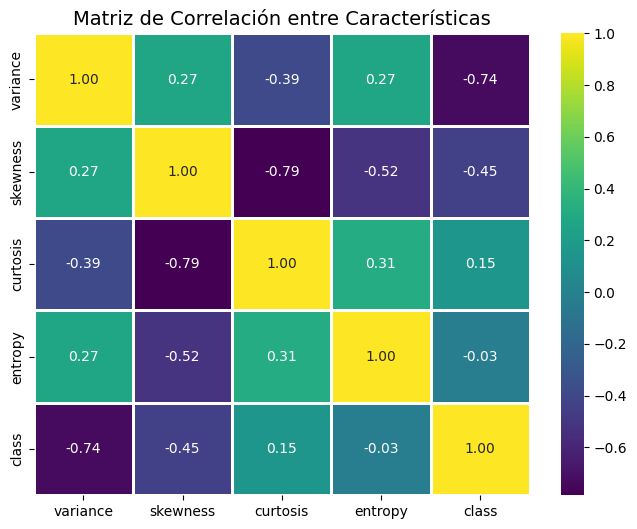

In [19]:
# Seleccionar solo las columnas numéricas para la matriz de correlación


# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear una figura y un eje (subplot) utilizando seaborn
plt.figure(figsize=(8, 6))

# Cambiar el colormap a 'viridis' (otro colormap fresco)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=1, linecolor='white')

# Añadir título
plt.title('Matriz de Correlación entre Características', fontsize=14)

# Mostrar la matriz de correlación
plt.show()


Por ultimo se peude concluir que se encontro las mejores caracteristicas, ya que con esas 3 se logra evidenciar una separacion de las clases y ya con eso se puede hacer un modelo con el cual hacer las predicciones

In [27]:
import plotly.graph_objects as go

# Seleccionar las características de interés
features = ['variance', 'skewness', 'curtosis']

# Filtrar el DataFrame para las características seleccionadas
data = df[features]

# Crear figura tridimensional
fig = go.Figure()

# Agregar un gráfico de dispersión 3D
fig.add_trace(go.Scatter3d(
    x=data['variance'],
    y=data['skewness'],
    z=data['curtosis'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['class'],  # Colorear según la clase Outcome
        colorscale='Viridis',       # Elección del mapa de colores
        opacity=0.8
    ),
    text=df['class'],       # Mostrar la clase en el hover
    hoverinfo='text'
))

# Configurar el diseño del gráfico 3D
fig.update_layout(
    scene=dict(
        xaxis_title='variance',
        yaxis_title='skewness',
        zaxis_title='curtosis'
    ),
    margin=dict(l=0, r=0, b=0, t=0)  # Configurar los márgenes
)

# Mostrar el gráfico
fig.show()